In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
topology = pd.read_csv("topology.csv")
topology.head()

,Topology,Memory
0,29\n 27\n 28\n 26\n 37\n 34\n 33,28248
1,29\n 27\n 28\n 26\n 37\n 34\n 33,28480
2,29\n 27\n 28\n 26\n 37\n 34\n 33,28508
3,29\n 27\n 28\n 26\n 33\n 37\n 34,29256
4,29\n 27\n 28\n 26\n 33\n 34\n 37,30268


In [3]:
hop_count_max = 5

def get_hop_counts(topology):
    mesh_nodes = topology.split("\n")
    hop_counts = [0] * (hop_count_max + 1)
    for mesh_node in mesh_nodes:
        hop_count = len(mesh_node) - len(mesh_node.lstrip())
        hop_counts[hop_count] += 1
    return hop_counts[1:-1]

topology["hop counts"] = topology["Topology"].map(get_hop_counts)


In [4]:
topology.head()

,Topology,Memory,hop counts
0,29\n 27\n 28\n 26\n 37\n 34\n 33,28248,"[4, 2, 0, 0]"
1,29\n 27\n 28\n 26\n 37\n 34\n 33,28480,"[3, 2, 1, 0]"
2,29\n 27\n 28\n 26\n 37\n 34\n 33,28508,"[2, 2, 2, 0]"
3,29\n 27\n 28\n 26\n 33\n 37\n 34,29256,"[2, 2, 1, 1]"
4,29\n 27\n 28\n 26\n 33\n 34\n 37,30268,"[1, 1, 1, 3]"


In [5]:
hop_count_columns = [str(x) for x in list(range(1, hop_count_max))] 
hop_count_columns = [x + " hop" for x in hop_count_columns]

topology_with_hops = pd.DataFrame(topology["hop counts"].to_list(), columns=hop_count_columns)
topology = pd.concat([topology, topology_with_hops], axis = 1)


In [6]:
# topology["Memory"] = topology["Memory"] - min(topology["Memory"])
topology

,Topology,Memory,hop counts,1 hop,2 hop,3 hop,4 hop
0,29\n 27\n 28\n 26\n 37\n 34\n 33,28248,"[4, 2, 0, 0]",4,2,0,0
1,29\n 27\n 28\n 26\n 37\n 34\n 33,28480,"[3, 2, 1, 0]",3,2,1,0
2,29\n 27\n 28\n 26\n 37\n 34\n 33,28508,"[2, 2, 2, 0]",2,2,2,0
3,29\n 27\n 28\n 26\n 33\n 37\n 34,29256,"[2, 2, 1, 1]",2,2,1,1
4,29\n 27\n 28\n 26\n 33\n 34\n 37,30268,"[1, 1, 1, 3]",1,1,1,3
5,29,22592,"[0, 0, 0, 0]",0,0,0,0
6,29\n 33,23244,"[1, 0, 0, 0]",1,0,0,0
7,29\n 33\n 34,24220,"[2, 0, 0, 0]",2,0,0,0
8,29\n 33\n 34\n 37,26068,"[2, 1, 0, 0]",2,1,0,0
9,29\n 33\n 27\n 34\n 37,26408,"[2, 2, 0, 0]",2,2,0,0


In [7]:
selected_columns = hop_count_columns + ["Memory"]
topology_memory_hops = topology[selected_columns]
topology_memory_hops

,1 hop,2 hop,3 hop,4 hop,Memory
0,4,2,0,0,28248
1,3,2,1,0,28480
2,2,2,2,0,28508
3,2,2,1,1,29256
4,1,1,1,3,30268
5,0,0,0,0,22592
6,1,0,0,0,23244
7,2,0,0,0,24220
8,2,1,0,0,26068
9,2,2,0,0,26408


In [8]:
import seaborn as sns
corr = topology_memory_hops.corr()
corr

,1 hop,2 hop,3 hop,4 hop,Memory
1 hop,1.000000,0.722829,-0.052285,-0.315049,0.500926
2 hop,0.722829,1.000000,0.261617,-0.068539,0.724031
3 hop,-0.052285,0.261617,1.000000,0.357450,0.600698
4 hop,-0.315049,-0.068539,0.357450,1.000000,0.532822
Memory,0.500926,0.724031,0.600698,0.532822,1.000000


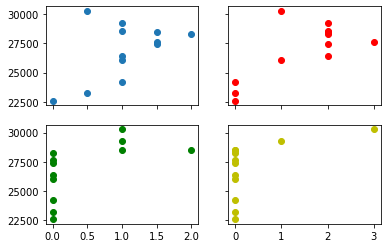

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(topology_memory_hops["1 hop"], topology_memory_hops["Memory"], 'o')
axs[0, 1].plot(topology_memory_hops["2 hop"], topology_memory_hops["Memory"], 'ro')
axs[1, 0].plot(topology_memory_hops["3 hop"], topology_memory_hops["Memory"], 'go')
axs[1, 1].plot(topology_memory_hops["4 hop"], topology_memory_hops["Memory"], 'yo')

for ax in axs.flat:
    ax.label_outer()

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(topology_memory_hops[hop_count_columns], topology_memory_hops["Memory"])
print("Coefficients: \n", model.coef_)
print(model.intercept_)

Coefficients: 
 [ 980.60599334  883.34221236 1163.60784314 1586.90344062]
22554.1982981872


In [11]:
prediction_topologies = pd.read_csv("predict_topologies.csv")
predictions = model.predict(prediction_topologies)
predictions

array([115080.99963004, 193402.68664447])

In [75]:
topology2 = pd.read_csv("topology2.csv")
topology2.head()

,Topology,Memory Used (KiB)
0,29,"[22752, 22740, 22700, 22688, 22864, 22820, 227..."
1,29\n 26,"[23244, 23288, 23356, 23376, 23352, 23316, 233..."
2,29\n 26\n 27,"[24916, 24900, 24908, 24904, 25080, 25092, 253..."
3,29\n 26\n 27,"[25592, 25572, 25500, 25516, 25688, 25508, 256..."
4,29\n 26\n 27\n 28,"[25444, 25464, 25620, 25660, 25692, 25680, 256..."


In [76]:
def parse_memory_list(memory_arr):
    arr = json.loads(memory_arr)
    memories = np.array(arr)
    return memories
    # return np.average(memories)


In [77]:
topology2["Memory Used (KiB)"] = topology2["Memory Used (KiB)"].map(parse_memory_list)
topology2

,Topology,Memory Used (KiB)
0,29,"[22752, 22740, 22700, 22688, 22864, 22820, 227..."
1,29\n 26,"[23244, 23288, 23356, 23376, 23352, 23316, 233..."
2,29\n 26\n 27,"[24916, 24900, 24908, 24904, 25080, 25092, 253..."
3,29\n 26\n 27,"[25592, 25572, 25500, 25516, 25688, 25508, 256..."
4,29\n 26\n 27\n 28,"[25444, 25464, 25620, 25660, 25692, 25680, 256..."
5,29\n 26\n 27\n 28,"[25340, 25320, 25316, 25304, 25404, 25580, 254..."
6,29\n 37\n 26\n 27\n 28\n 34\n 33,"[25680, 25612, 25688, 25676, 25660, 25648, 256..."
7,29\n 37\n 26\n 27\n 28\n 33\n 34,"[25704, 25688, 25792, 25836, 25804, 25824, 258..."


In [78]:
lst_col = "Memory Used (KiB)"
s = topology2.apply(lambda x: pd.Series(x[lst_col]), axis=1).stack().reset_index(level=1, drop=True)
s.name = lst_col

topology2 = topology2.drop(lst_col, axis=1).join(s)
topology2[lst_col] = pd.Series(topology2[lst_col], dtype=object)
topology2

,Topology,Memory Used (KiB)
0,29,22752.0
0,29,22740.0
0,29,22700.0
0,29,22688.0
0,29,22864.0
...,...,...
7,29\n 37\n 26\n 27\n 28\n 33\n 34,25912.0
7,29\n 37\n 26\n 27\n 28\n 33\n 34,25876.0
7,29\n 37\n 26\n 27\n 28\n 33\n 34,25956.0
7,29\n 37\n 26\n 27\n 28\n 33\n 34,25804.0


In [79]:
topology2.rename(columns={"Memory Used (KiB)": "Memory"}, inplace=True)
topology2.reset_index(inplace=True, drop=True)
topology2

,Topology,Memory
0,29,22752.0
1,29,22740.0
2,29,22700.0
3,29,22688.0
4,29,22864.0
...,...,...
112,29\n 37\n 26\n 27\n 28\n 33\n 34,25912.0
113,29\n 37\n 26\n 27\n 28\n 33\n 34,25876.0
114,29\n 37\n 26\n 27\n 28\n 33\n 34,25956.0
115,29\n 37\n 26\n 27\n 28\n 33\n 34,25804.0


In [80]:

topology2["hop counts"] = topology2["Topology"].map(get_hop_counts)
topology2_with_hops = pd.DataFrame(topology2["hop counts"].to_list(), columns=hop_count_columns)
topology2 = pd.concat([topology2, topology2_with_hops], axis = 1)

In [81]:
# Topologies with 4 or less mesh nodes

topology2["total hops"] = topology2["hop counts"].map(lambda arr: sum(arr))
nodes_less_than_four = topology2[topology2["total hops"] <= 4]
nodes_less_than_four


,Topology,Memory,hop counts,1 hop,2 hop,3 hop,4 hop,total hops
0,29,22752.0,"[0, 0, 0, 0]",0,0,0,0,0
1,29,22740.0,"[0, 0, 0, 0]",0,0,0,0,0
2,29,22700.0,"[0, 0, 0, 0]",0,0,0,0,0
3,29,22688.0,"[0, 0, 0, 0]",0,0,0,0,0
4,29,22864.0,"[0, 0, 0, 0]",0,0,0,0,0
...,...,...,...,...,...,...,...,...
67,29\n 26\n 27\n 28,25580.0,"[1, 2, 0, 0]",1,2,0,0,3
68,29\n 26\n 27\n 28,25474.0,"[1, 2, 0, 0]",1,2,0,0,3
69,29\n 26\n 27\n 28,25620.0,"[1, 2, 0, 0]",1,2,0,0,3
70,29\n 26\n 27\n 28,25696.0,"[1, 2, 0, 0]",1,2,0,0,3


In [82]:
topology2_memory_hops = nodes_less_than_four[selected_columns]
topology2_memory_hops

,1 hop,2 hop,3 hop,4 hop,Memory
0,0,0,0,0,22752.0
1,0,0,0,0,22740.0
2,0,0,0,0,22700.0
3,0,0,0,0,22688.0
4,0,0,0,0,22864.0
...,...,...,...,...,...
67,1,2,0,0,25580.0
68,1,2,0,0,25474.0
69,1,2,0,0,25620.0
70,1,2,0,0,25696.0


In [83]:
topologies = pd.concat([topology_memory_hops, topology2_memory_hops], axis = 0)
topologies.reset_index(inplace=True, drop=True)

In [84]:
model2 = LinearRegression()
model2.fit(topologies[hop_count_columns], topologies["Memory"])
print("Coefficients: \n", model2.coef_)
print(model2.intercept_)

Coefficients: 
 [1200.07682514  720.7514959   940.60337924 1556.2731584 ]
22782.678323464024


In [85]:
predictions2 = model2.predict(prediction_topologies)
predictions2

array([ 99313.62582953, 184324.08933161])